<IPython.core.display.Javascript object>


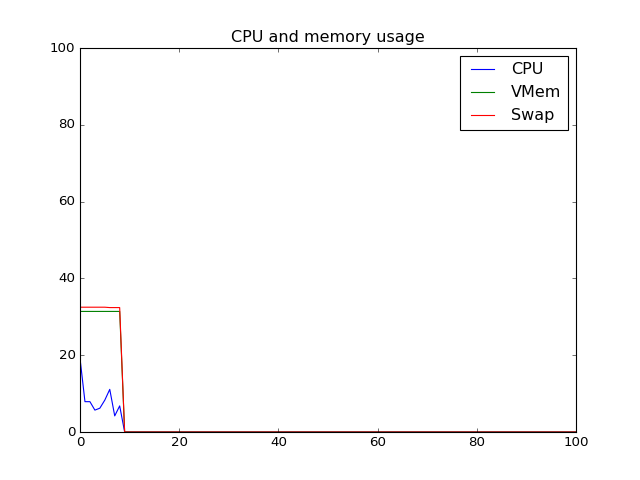

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import psutil

seconds = 101
CpuLoad = np.zeros(seconds)
VMemUsage = np.zeros(seconds)
SwapUsage = np.zeros(seconds)
TimeScale = np.arange(seconds)

fig, ax = plt.subplots()
fig.set_label('My system monitor')
ax.set_title('CPU and memory usage')
cpu_load_line, = ax.plot(TimeScale, CpuLoad, label='CPU')
vmem_usage_line, = ax.plot(TimeScale, VMemUsage, label='VMem')
swap_usage_line, = ax.plot(TimeScale, SwapUsage, label='Swap')
ax.set_xlim(TimeScale[0], TimeScale[-1])
ax.set_ylim(0, 100)
ax.legend()

def update_line(line, data, val):
    # Shift array to the righ and insert new value at leftmost position
    data[1:] = data[:-1]
    data[0] = val
    # Update line with new data
    line.set_ydata(data)

def update(_):
    # Update all lines
    update_line(cpu_load_line, CpuLoad, psutil.cpu_percent())
    update_line(vmem_usage_line, VMemUsage, psutil.virtual_memory().percent)
    update_line(swap_usage_line, SwapUsage, psutil.swap_memory().percent)

ani = animation.FuncAnimation(fig, update, interval=1000)
plt.show()
